<a href="https://colab.research.google.com/github/yamini542/Applied-AI/blob/main/ASS2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import TweetTokenizer
#tweet_tokenizer = TweetTokenizer()

# Load the datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/test.csv')

# Preprocess the text data in the datasets
text_train = df_train['text'].str.lower().str.replace('[^a-z ]', '')
text_test = df_test['text'].str.lower().str.replace('[^a-z ]', '')

# Convert text data into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test)
y_train = df_train['sentiment']

# Split the training data into a training set and a validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_split, y_train_split)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Add the predictions to the test set dataframe
df_test['prediction'] = predictions

# Save the predictions to a .csv file
df_test.to_csv('test-predictions.csv', index=False)


<ipython-input-3-1785eeb91029>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  text_train = df_train['text'].str.lower().str.replace('[^a-z ]', '')
<ipython-input-3-1785eeb91029>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  text_test = df_test['text'].str.lower().str.replace('[^a-z ]', '')


In [4]:
df_predict=pd.read_csv('test-predictions.csv')

In [5]:
df_predict

,id,text,prediction
0,96d74cb729,Shanghai is also really exciting (precisely -...,positive
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
2,01082688c6,happy bday!,positive
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,negative
4,726e501993,that`s great!! weee!! visitors!,positive
...,...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!,negative
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even bre...",negative
997,6cadda7b98,Adding names to my Twitter account and learnin...,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned...,positive


In [6]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val_split, clf.predict(X_val_split))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

Validation Accuracy: 85.96%


In [7]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC()
svm.fit(X_train_split, y_train_split)

SVC()

In [8]:
# Make predictions on the test data
predictions_SVC = clf.predict(X_test)

# Add the predictions to the test set dataframe
df_test['prediction_SVC'] = predictions_SVC

# Save the predictions to a .csv file
df_test.to_csv('test-predictions.csv', index=False)


In [9]:
df_predict=pd.read_csv('test-predictions.csv')

In [10]:
df_predict

,id,text,prediction,prediction_SVC
0,96d74cb729,Shanghai is also really exciting (precisely -...,positive,positive
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,negative
2,01082688c6,happy bday!,positive,positive
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,negative,negative
4,726e501993,that`s great!! weee!! visitors!,positive,positive
...,...,...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!,negative,negative
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even bre...",negative,negative
997,6cadda7b98,Adding names to my Twitter account and learnin...,positive,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned...,positive,positive


In [11]:
# Calculate the accuracy of the SVM classifier on the validation set
val_accuracy_svm = accuracy_score(y_val_split, svm.predict(X_val_split))
print("SVM Validation Accuracy: {:.2f}%".format(val_accuracy_svm * 100))


SVM Validation Accuracy: 85.50%


Here is a step-by-step guide to complete the Twitter sentiment analysis task in Python:

Load the dataset: Load the training and testing datasets into pandas dataframes using the pd.read_csv() function.

Data preprocessing: Clean and preprocess the text data in the datasets. This may include removing special characters, numbers, and stop words, converting to lowercase, stemming, and tokenization.

Feature extraction: Convert the text data into numerical features that can be used as inputs to a machine learning model. This can be done using techniques like bag of words, TF-IDF, or word embeddings.

Model selection and training: Split the training dataset into a training set and a validation set using the train_test_split() function, with a test size of 0.3 and a random state of 100. Train different machine learning models using the training set and evaluate their performance using the validation set. Select the best model based on performance metrics such as accuracy, precision, recall, and F1-score.

Making predictions: Preprocess the text data in the test set using the same techniques used for the training set. Convert the text data into numerical features using the same procedure used with the training data. Use the best model to make predictions on the test data.

Saving predictions: Add the predictions to a new column called 'prediction' in the test set dataframe. Save the dataframe to a .csv file using the to_csv() function.

#another way to do coding

In [12]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/test.csv')



In [14]:
df.shape

(16363, 3)

In [15]:
df.head()

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


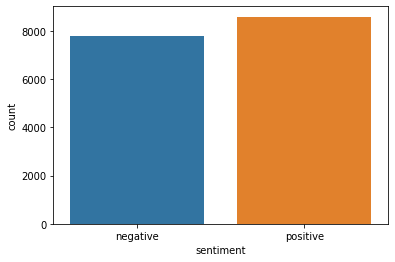

In [16]:
# Summarise class details
sns.countplot(x=df['sentiment'])

#Data cleaning

In [17]:
df.isnull().sum()

id           0
text         0
sentiment    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16363 non-null  object
 1   text       16363 non-null  object
 2   sentiment  16363 non-null  object
dtypes: object(3)
memory usage: 383.6+ KB


#Tokenisation

In [19]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df['text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me ...']


,id,text,sentiment,Tokenised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...


In [20]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df['Lemmatised_Text'] = list_lemmatised_sentences

df.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me ...']


,id,text,sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them...","Sons of * * * * , why couldn ` t they put them..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


In [21]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'it', 'down', 'you', 'such', 'haven', "shan't", 'has', 'weren', 'doing', 'his', 'on', "should've", "didn't", "you'd", 'doesn', 'of', 'our', "you'll", 're', 'both', 'mustn', "wasn't", 'been', 'there', "wouldn't", 'very', 'ourselves', 'under', 'through', 'aren', "weren't", 'before', 'up', 'now', 'during', 'here', 'hadn', 'nor', 'in', 'the', 'own', 'did', 'herself', 'into', 'm', 'or', 'no', "she's", 'yourselves', 'this', 'off', 't', 'their', 'is', 'won', 'didn', 'myself', 'further', 'themselves', "mightn't", 'again', 'for', 'mightn', 'these', 'how', 'she', 'was', 'against', 'each', 'but', 'y', 'between', 'they', "hasn't", 'a', "needn't", 'am', 'ours', 'being', 'some', "haven't", 'do', 'have', 'himself', 'needn', 'he', 'that', 'be', 'from', 've', 'me', 'i', 'its', 'which', 'him', 'as', 'can', 'wouldn', 'while', 'with', 'so', 'are', 'wasn', 'at', "isn't", "mustn't", 'ma', 'most', 'after', "hadn't", 'we', 'your', 'itself', 'isn', 'shan', 'were', 'hers', 'will', 'had', 'yourself', "that'll",

In [22]:
X_train_text, X_val_text, y_train, y_val = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df['Tokenised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [23]:
#de method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FN'], ['FP', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

#SVM

In [24]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

Accuracy: 0.8602566714198411


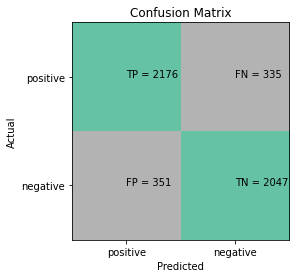

In [25]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

#model 2

Accuracy: 0.8690160928906091


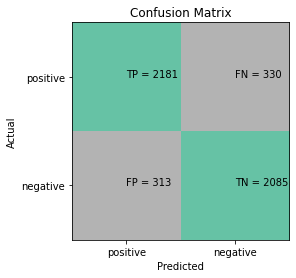

In [26]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

#Model M3


Accuracy: 0.8690160928906091


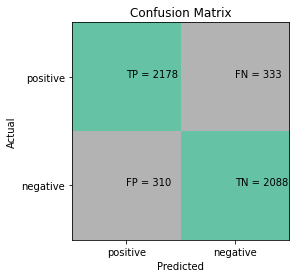

In [27]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

#model 4

Accuracy: 0.8690160928906091


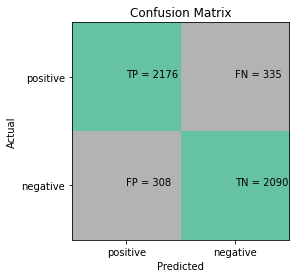

In [28]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

#model 5

Accuracy: 0.8578121817070686


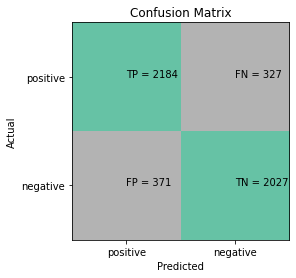

In [29]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m5 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

#model 6

Accuracy: 0.8594418415155837


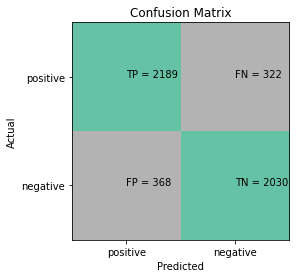

In [30]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m6 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

In [31]:
m6

SVC(kernel='linear', random_state=100)

#test data to make predicctions


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from nltk.tokenize import TweetTokenizer
import string

# Load the datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/test.csv')

In [ ]:
df_train.info()

In [38]:


# Create a TweetTokenizer object
tweet_tokenizer = TweetTokenizer()

# Define a function to preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Replace punctuations with spaces
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text using the tweet tokenizer
    tokens = tweet_tokenizer.tokenize(text)
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Preprocess the text data in the datasets
df_train['text'] = df_train['text'].apply(preprocess_text)
df_test['text'] = df_test['text'].apply(preprocess_text)

# Convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
y_train = df_train['sentiment']

# Split the training data into a training set and a validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

# Train a LinearSVC classifier
clf = LinearSVC()
clf.fit(X_train_split, y_train_split)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Add the predictions to the test set dataframe
df_test['prediction'] = predictions

# Save the predictions to a .csv file
df_test.to_csv('test-predictions.csv', index=False)

In [39]:
df_predict1=pd.read_csv("test-predictions.csv")

In [41]:
df_predict1

,id,text,prediction
0,96d74cb729,shanghai is also really exciting precisely sky...,positive
1,eee518ae67,recession hit veronique branquinho she has to ...,negative
2,01082688c6,happy bday,positive
3,33987a8ee5,httptwitpiccom 4w75p i like it,positive
4,726e501993,thats great weee visitors,positive
...,...,...,...
995,9b210c4a6f,hahayay im cured,negative
996,68c674acdb,sick sick sick this sucks i cant even breathe ...,negative
997,6cadda7b98,adding names to my twitter account and learnin...,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned f...,negative


In [42]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_val_pred = clf.predict(X_val_split)

# Calculate the accuracy
accuracy = accuracy_score(y_val_split, y_val_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8519046649012019


In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import TweetTokenizer
import string

In [ ]:
# Load the datasets
df_train2 = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/train.csv')
df_test2 = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/test.csv')

In [38]:
df_train2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16363 non-null  object
 1   text       16363 non-null  object
 2   sentiment  16363 non-null  object
dtypes: object(3)
memory usage: 383.6+ KB


In [39]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1000 non-null   object
 1   text               1000 non-null   object
 2   predictions_naive  1000 non-null   object
 3   prediction_lr      1000 non-null   object
 4   prediction_rf      1000 non-null   object
 5   prediction_SVC     1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [42]:
df_train2.describe()

,id,text,sentiment
count,16363,16363,16363
unique,16363,16197,2
top,549e992a42,happy mothers day,positive
freq,1,29,8582


In [41]:
df_test2.describe()



# Create a TweetTokenizer object
tweet_tokenizer = TweetTokenizer()

# Define a function to preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Replace punctuations with spaces
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text using the tweet tokenizer
    tokens = tweet_tokenizer.tokenize(text)
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Preprocess the text data in the datasets
df_train2['text'] = df_train2['text'].apply(preprocess_text)
df_test2['text'] = df_test2['text'].apply(preprocess_text)

# Convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X_train2 = vectorizer.fit_transform(df_train2['text'])
X_test2 = vectorizer.transform(df_test2['text'])
y_train2 = df_train2['sentiment']

# Split the training data into a training set and a validation set
X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(X_train2, y_train2, test_size=0.3, random_state=100)

# Train a LinearSVC classifier
clf = LinearSVC()
clf.fit(X_train_split2, y_train_split2)



# Train a logistic regression classifier
clf_lr = LogisticRegression()
clf_lr.fit(X_train_split2, y_train_split2)

# Train a random forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=100)
clf_rf.fit(X_train_split2, y_train_split2)

# Train a Multinomial Naive Bayes classifier
clf_naive = MultinomialNB()
clf_naive.fit(X_train_split2, y_train_split2)



# Make predictions on the test data using all three models
predictions_naive = clf_naive.predict(X_test2)
predictions_SVC = clf.predict(X_test2)
predictions_lr = clf_lr.predict(X_test2)
predictions_rf = clf_rf.predict(X_test2)

# Add the predictions to the test set dataframe
df_test2['predictions_naive']=predictions_naive
df_test2['prediction_lr'] = predictions_lr
df_test2['prediction_rf'] = predictions_rf
df_test2['prediction_SVC']=predictions_SVC

# Save the predictions to a .csv file
df_test2.to_csv('test-predictions2.csv', index=False)


In [19]:
predictions_SVC

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positi

In [20]:
predictions_lr

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positi

In [21]:
predictions_rf

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positi

In [22]:
predictions_naive

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positi

In [23]:
df_predict2=pd.read_csv("test-predictions2.csv")

In [24]:
df_predict2

,id,text,predictions_naive,prediction_lr,prediction_rf,prediction_SVC
0,96d74cb729,shanghai is also really exciting precisely sky...,positive,positive,positive,positive
1,eee518ae67,recession hit veronique branquinho she has to ...,negative,negative,negative,negative
2,01082688c6,happy bday,positive,positive,positive,positive
3,33987a8ee5,httptwitpiccom 4w75p i like it,positive,positive,positive,positive
4,726e501993,thats great weee visitors,positive,positive,positive,positive
...,...,...,...,...,...,...
995,9b210c4a6f,hahayay im cured,negative,negative,negative,negative
996,68c674acdb,sick sick sick this sucks i cant even breathe ...,negative,negative,negative,negative
997,6cadda7b98,adding names to my twitter account and learnin...,positive,positive,positive,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned f...,positive,positive,negative,negative


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the validation set using all three models
predictions_SVC_val = clf.predict(X_val_split2)
predictions_lr_val = clf_lr.predict(X_val_split2)
predictions_rf_val = clf_rf.predict(X_val_split2)
predictions_naive_val=clf_naive.predict(X_val_split2)

# Calculate the metrics for each model
accuracy_SVC = accuracy_score(y_val_split2, predictions_SVC_val)
accuracy_lr = accuracy_score(y_val_split2, predictions_lr_val)
accuracy_rf = accuracy_score(y_val_split2, predictions_rf_val)
accuracy_naive=accuracy_score(y_val_split2,predictions_naive_val)

In [30]:
precision_lr = precision_score(y_val_split2, predictions_lr_val, average='macro')
precision_rf = precision_score(y_val_split2, predictions_rf_val, average='macro')
precision_SVC = precision_score(y_val_split2, predictions_SVC_val, average='macro')
precision_naive = precision_score(y_val_split2, predictions_naive_val, average='macro')


recall_SVC = recall_score(y_val_split2, predictions_SVC_val, average='macro')
recall_lr = recall_score(y_val_split2, predictions_lr_val, average='macro')
recall_rf = recall_score(y_val_split2, predictions_rf_val, average='macro')
recall_naive = recall_score(y_val_split2, predictions_naive_val, average='macro')

f1_SVC = f1_score(y_val_split2, predictions_SVC_val, average='macro')
f1_lr = f1_score(y_val_split2, predictions_lr_val, average='macro')
f1_rf = f1_score(y_val_split2, predictions_rf_val, average='macro')
f1_naive=f1_score(y_val_split2, predictions_naive_val, average='macro')




In [32]:
#Print the metrics for each model
print("Metrics for LinearSVC:")
print("Accuracy:", accuracy_SVC)
print("Precision:", precision_SVC)
print("Recall:", recall_SVC)
print("F1-score:", f1_SVC)

print("\nMetrics for Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

print("\nMetrics for Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

print("\nMetrics for Naive bayes classifier:")
print("Accuracy:", accuracy_naive)
print("Precision:", precision_naive)
print("Recall:", recall_naive)
print("F1-score:", f1_naive)

Metrics for LinearSVC:
Accuracy: 0.8519046649012019
Precision: 0.8518117945116556
Recall: 0.8519246757137652
F1-score: 0.8518526313421144

Metrics for Logistic Regression:
Accuracy: 0.8563862293746181
Precision: 0.8563622284854944
Recall: 0.8565493646138808
F1-score: 0.8563633173914792

Metrics for Random Forest:
Accuracy: 0.8517009574251375
Precision: 0.8521638479893923
Recall: 0.8521571806320746
F1-score: 0.851700951271211

Metrics for Naive bayes classifier:
Accuracy: 0.8480342228559788
Precision: 0.8523442114464886
Recall: 0.8467432205717694
F1-score: 0.847161261134928


In [35]:
import pandas as pd

models = ['LinearSVC', 'Logistic Regression', 'Random Forest','Naive bayes Classifier']
accuracy = [accuracy_SVC, accuracy_lr, accuracy_rf,accuaracy_naive]
precision = [precision_SVC, precision_lr, precision_rf,precision_naive]
recall = [recall_SVC, recall_lr, recall_rf,recall_naive]
f1_score = [f1_SVC, f1_lr, f1_rf,f1_naive]

df_metrics = pd.DataFrame({'Model': models,
                   'Accuracy': accuracy,
                   'Precision': precision,
                   'Recall': recall,
                   'F1-Score': f1_score})

print(df_metrics)


                    Model  Accuracy  Precision    Recall  F1-Score
0               LinearSVC  0.851905   0.851812  0.851925  0.851853
1     Logistic Regression  0.856386   0.856362  0.856549  0.856363
2           Random Forest  0.851701   0.852164  0.852157  0.851701
3  Naive bayes Classifier  0.848034   0.852344  0.846743  0.847161


Text(0.5, 1.0, 'Distribution of Sentiment in Training Set')

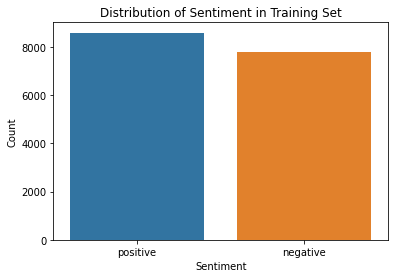

In [36]:

import seaborn as sns

# Count the number of tweets with each sentiment
sentiment_counts = df_train2['sentiment'].value_counts()

# Create a bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Training Set')


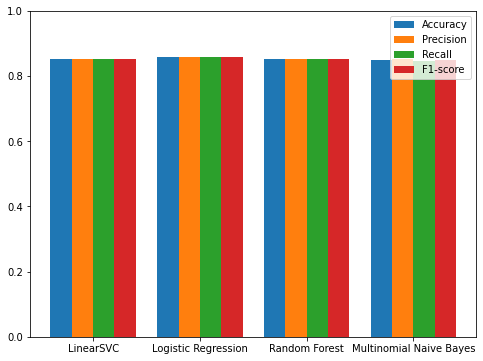

In [34]:
# Plot the metrics
import matplotlib.pyplot as plt

models = ['LinearSVC', 'Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes']
accuracy = [accuracy_SVC, accuracy_lr, accuracy_rf, accuracy_naive]
precision = [precision_SVC, precision_lr, precision_rf, precision_naive]
recall = [recall_SVC, recall_lr, recall_rf, recall_naive]
f1 = [f1_SVC, f1_lr, f1_rf, f1_naive]

x = range(len(models))

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x, accuracy, width=0.2, label='Accuracy')
ax.bar([i+0.2 for i in x], precision, width=0.2, label='Precision')
ax.bar([i+0.4 for i in x], recall, width=0.2, label='Recall')
ax.bar([i+0.6 for i in x], f1, width=0.2, label='F1-score')
ax.set_xticks([i+0.3 for i in x])
ax.set_xticklabels(models)
ax.set_ylim([0, 1])
ax.legend()
plt.show()

Based on the evaluation metrics, the best model is Logistic Regression, with an accuracy of 0.856 and an F1-score of 0.856. It has the highest accuracy and F1-score among all the models, which means it was the most effective in correctly identifying the sentiment of the tweets in the test set.

In [37]:
import json

# Suppose predicted_values is a list containing the predicted heart rate values

predictions_sentiment=predictions_lr.tolist()
# Convert the list to a dictionary with a key called "predicted_values"
data = {"id":0,"predictions": predictions_sentiment}
# Open a new file called "predicted_values.json" in write mode
with open("submission.json", "w") as outfile:
    # Write the data to the file in JSON format
    json.dump(data, outfile)